In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
plt.rcParams['figure.figsize'] = (12, 6)

In [51]:
df = pd.read_csv("input/BODY.csv")
df["time"] = df["time"].str.replace("+0000", "")
df["time"] = pd.to_datetime(df["time"])

In [52]:
FECHA_INICIAL = pd.to_datetime("01-10-2023", dayfirst=True)
FECHA_FINAL = pd.to_datetime("31-10-2023", dayfirst=True)

In [53]:
df_fecha = df[(df.time >= FECHA_INICIAL) & (df.time <= FECHA_FINAL)]

In [54]:
calculo_pesos = df_fecha.groupby(pd.Grouper(key="time", freq="W")).mean()

,weight,height,bmi,fatRate,bodyWaterRate,boneMass,metabolism,muscleRate,visceralFat
time,,,,,,,,,
2023-10-01,77.100000,173.0,25.700000,24.529846,51.772526,2.962406,1677.000000,55.225082,10.0
2023-10-08,77.191667,173.0,25.733333,24.638173,51.698214,2.961639,1678.666667,55.210983,10.0
2023-10-15,77.290000,173.0,25.760000,24.678565,51.670505,2.963858,1680.400000,55.251788,10.0
2023-10-22,78.135714,173.0,26.057143,25.023135,51.434129,2.982808,1692.714286,55.600224,10.0
2023-10-29,77.850000,173.0,25.966667,24.865236,51.542448,2.978117,1688.666667,55.513971,10.0
2023-11-05,77.900000,173.0,26.000000,25.107204,51.376457,2.970349,1689.000000,55.371140,10.0


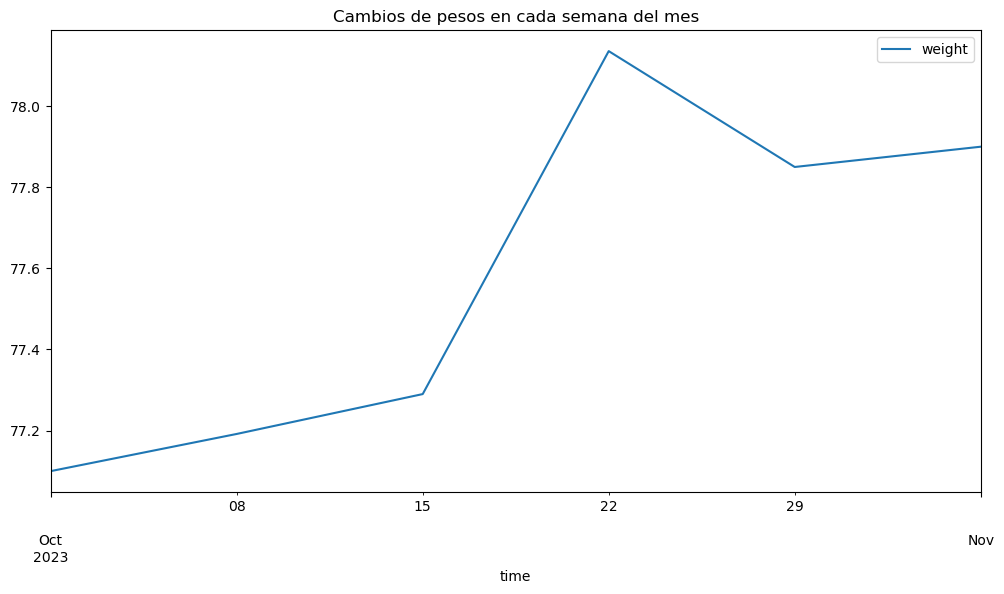

In [58]:
display(calculo_pesos)
calculo_pesos.plot(y="weight", title="Cambios de pesos en cada semana del mes")
plt.show()

In [60]:
primera_semana_mes = calculo_pesos.iloc[0]["weight"]
ultima_semana_mes = calculo_pesos.iloc[-1]["weight"]
diferencia = ultima_semana_mes - primera_semana_mes

print(f"> El peso de la primera semana del mes fue: {primera_semana_mes:.2f}\n"
      f"> El peso de la ultima semana del mes fue: {ultima_semana_mes:.2f}\n"
      f">> La diferencia entre la primera y ultima semana del mes fue: {diferencia:.2f}")

> El peso de la primera semana del mes fue: 77.10
> El peso de la ultima semana del mes fue: 77.90
>> La diferencia entre la primera y ultima semana del mes fue: 0.80
